#**Project Name:** Student Performance Analysis

##**Project Title:** Understanding Factors Influencing Student Performance, A Comprehensive Analysis of Demographics, Academic Habits, and Scores

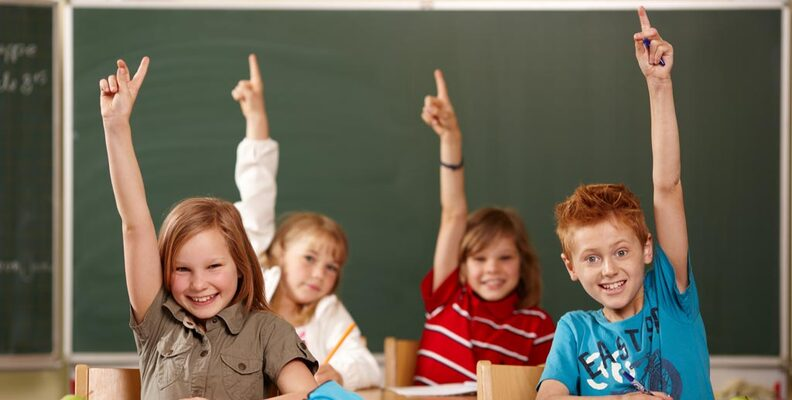

# Objective

The objective of the "Student Performance Analysis" project is to investigate and examine a dataset that contains factual data about students, with the purpose of gaining insights and understanding. The main goals of this research are to examine different variables that might impact student performance, analyse patterns and correlations in the data, and finally construct and assess machine learning models to forecast student achievement using demographic and academic characteristics.

##Key Tasks:

### 01. Data Preparation and Cleaning:

Import and analyse the dataset, ensuring the absence of any missing or erroneous data.
Perform data cleaning activities include imputing missing values, rectifying mistakes, and interpreting pertinent characteristics.


###02. Exploratory Data Analysis (EDA) and Visualization:

Calculate statistical measures for numerical columns.
Analyse the dispersion of numerical characteristics by using visual representations such as histograms.
Analyse the associations between various columns using scatter plots, correlation matrices, and other methods.
Derive compelling observations from the exploratory data analysis (EDA) procedure.


### 03. Feature Engineering:

Augment the model's prediction capability by including further functionalities or altering current ones.
Transform categorical variables into numerical representations to ensure their compatibility with machine learning methods.


### 04. Machine Learning Model Training and Evaluation:

Select and train machine learning models appropriate for a categorization objective, such as forecasting student achievement.

### 05. Conclusion and Future Recommendations:

Provide a concise overview of the main discoveries and understandings derived from the investigation.
Offer a definitive assessment on the efficacy of the machine learning models in forecasting student achievement.
Propose concepts for future projects, enhancements, or supplementary examinations


### Import all necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [ ]:
import seaborn as sns

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Read the "Student.csv" CSV file into a Pandas dataframe.
StdntEv = pd.read_csv('Stuent.csv')

##Display concise information about the DataFrame

In [ ]:
#print information about the DataFrame
print(StdntEv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [ ]:
# show First 5 rows
StdntEv .head()

Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  
3         5 - 10         45            56            42  
4         5 - 10         76            78            75

# Data Cleaning (Data Quality).

In [ ]:
print(StdntEv .isnull().sum())

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [ ]:
CStdntEv = StdntEv .dropna()

In [ ]:
print(CStdntEv .isnull().sum())

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64


In [ ]:
CStdntEv.describe()


Unnamed: 0    NrSiblings     MathScore  ReadingScore  WritingScore
count  19243.000000  19243.000000  19243.000000  19243.000000  19243.000000
mean     501.651769      2.147482     66.635504     69.534324     68.602869
std      289.462867      1.443735     15.362362     14.785547     15.481824
min        0.000000      0.000000      0.000000     10.000000      4.000000
25%      251.000000      1.000000     56.000000     59.000000     58.000000
50%      503.000000      2.000000     67.000000     70.000000     69.000000
75%      754.000000      3.000000     78.000000     80.000000     80.000000
max      999.000000      7.000000    100.000000    100.000000    100.000000

# Analyze data

In [ ]:
new_stdnt = CStdntEv.copy()

In [ ]:
new_stdnt['Tot_Score'] = CStdntEv['MathScore'] + CStdntEv['ReadingScore'] + CStdntEv['WritingScore']


In [ ]:
new_stdnt['Avg_Score'] = new_stdnt[['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1).round(2)

In [ ]:
# show First 5 rows
new_stdnt.head()

Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
2           2  female     group B     master's degree      standard   
4           4    male     group C        some college      standard   
5           5  female     group B  associate's degree      standard   
6           6  female     group B        some college      standard   
7           7    male     group B        some college  free/reduced   

    TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
2       none              single     sometimes          yes         4.0   
4       none             married     sometimes          yes         0.0   
5       none             married     regularly          yes         1.0   
6  completed             widowed         never           no         1.0   
7       none             married     sometimes          yes         1.0   

  TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  \
2     school_bus            < 5         87            93            91   
4     school_bus         5 - 10         76            78            75   
5     school_bus         5 - 10         73            84            79   
6        private         5 - 10         85            93            89   
7        private           > 10         41            43            39   

   Tot_Score  Avg_Score  
2        271      90.33  
4        229      76.33  
5        236      78.67  
6        267      89.00  
7        123      41.00

##Note: The following code snippet was obtained from Stack Overflow

***Source: https://stackoverflow.com/questions/65052443/creating-a-grouped-bar-plot-with-seaborn***

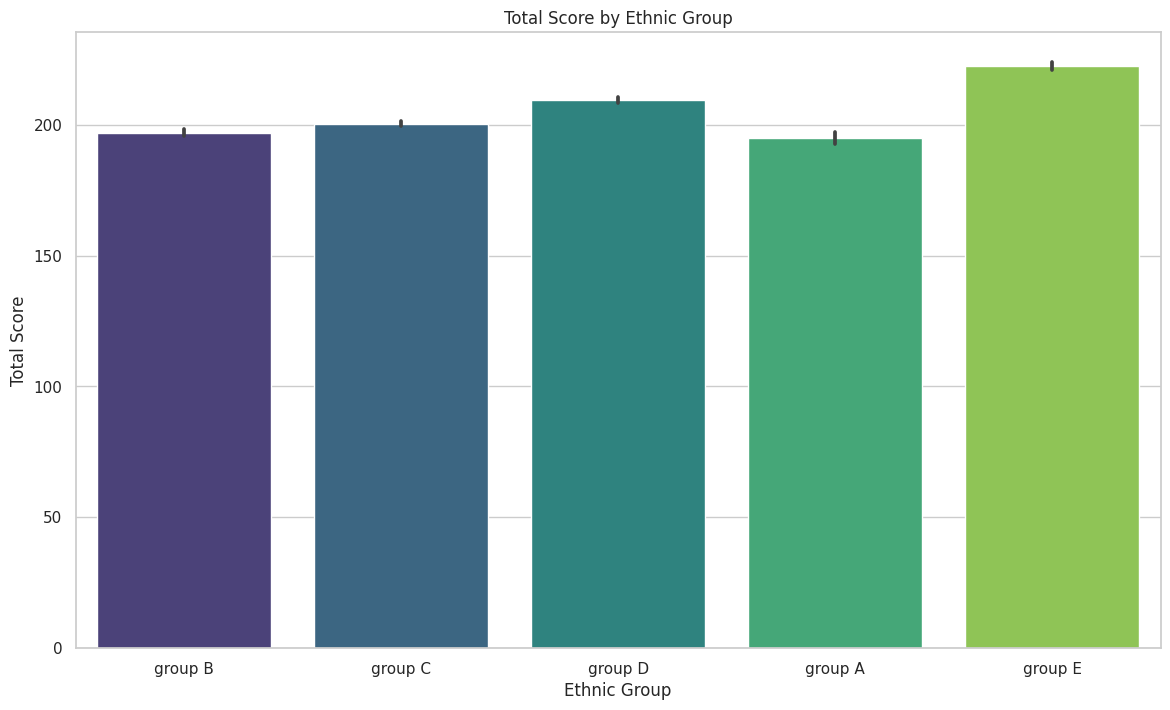

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='EthnicGroup', y='Tot_Score', data=new_stdnt, palette='viridis')

# Set plot title and labels
plt.title("Total Score by Ethnic Group")
plt.xlabel("Ethnic Group")
plt.ylabel("Total Score")

# Show the plot
plt.show()

###**Note: The following code snippet was obtained from Stack Overflow**

***Source: https://stackoverflow.com/questions/48433292/seaborn-color-palette-with-pandas-groupby-and-plot-function***

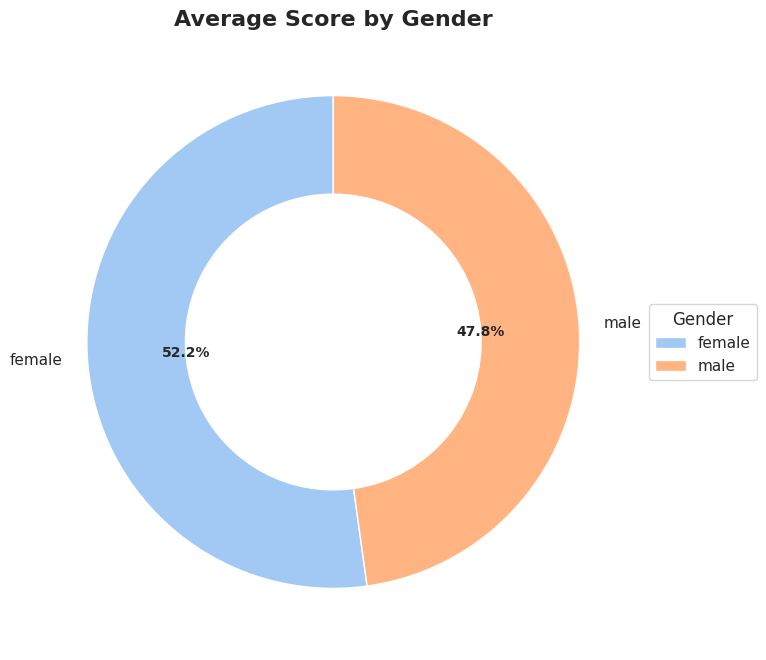

In [ ]:
# Pie chart for Gender distribution with custom colors
colors = sns.color_palette('pastel')[0:2]
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(new_stdnt.groupby('Gender')['Avg_Score'].sum(), labels=new_stdnt['Gender'].unique(), autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))
ax.legend(wedges, new_stdnt['Gender'].unique(), title='Gender', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight='bold')
ax.set_title('Average Score by Gender', size=16, weight='bold')
plt.show()


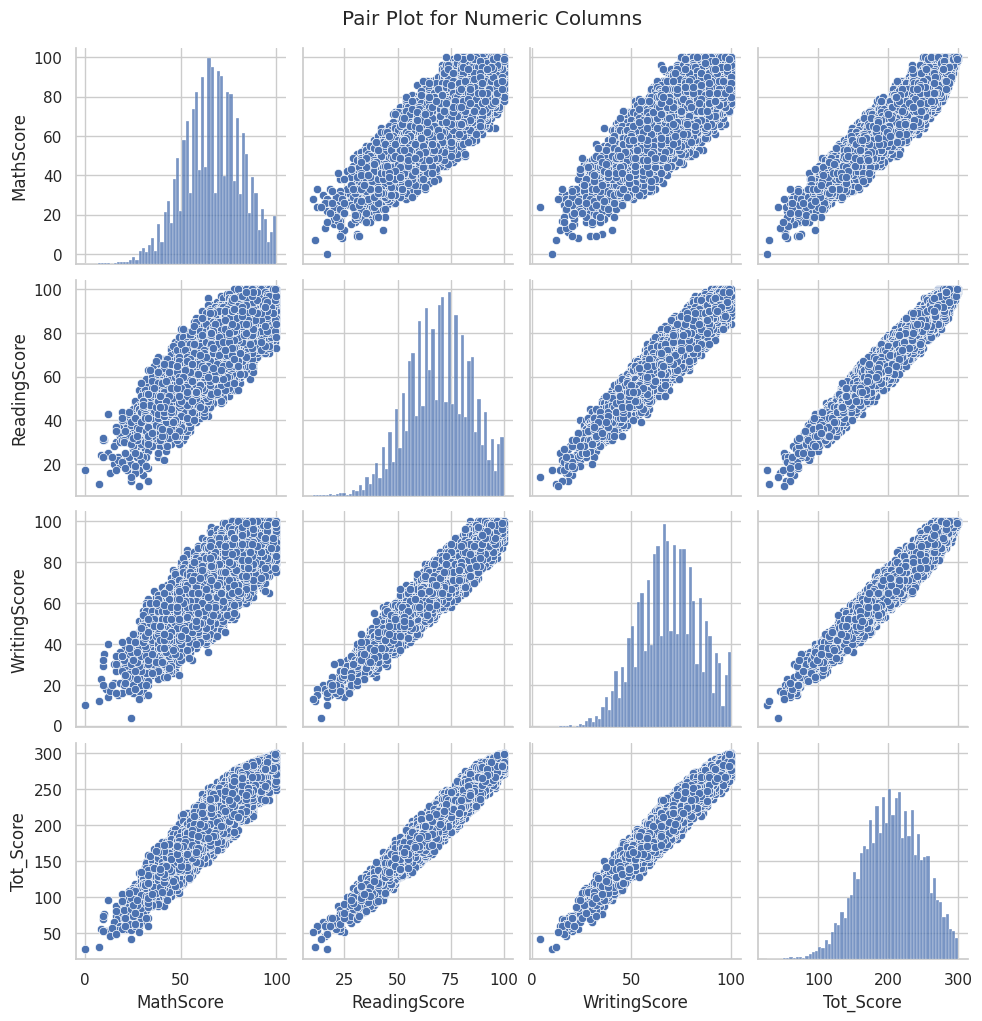

In [ ]:
# Pair plot for selected numeric columns
selected_numeric_cols = ['WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore', 'Tot_Score']
sns.pairplot(new_stdnt[selected_numeric_cols])
plt.suptitle("Pair Plot for Numeric Columns", y=1.02)
plt.show()

# Data manipulation

In [ ]:
categorical_cols = new_stdnt.select_dtypes(include='object').columns

In [ ]:
encoded_df = new_stdnt.copy()

In [ ]:
# Use LabelEncoder for categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    encoded_df[col] = label_encoder.fit_transform(new_stdnt[col].astype(str))

In [ ]:
print("\nEncoded DataFrame:")
print(encoded_df.head())


Encoded DataFrame:
   Unnamed: 0  Gender  EthnicGroup  ParentEduc  LunchType  TestPrep  \
2           2       0            1           3          1         1   
4           4       1            2           4          1         1   
5           5       0            1           0          1         1   
6           6       0            1           4          1         0   
7           7       1            1           4          0         1   

   ParentMaritalStatus  PracticeSport  IsFirstChild  NrSiblings  \
2                    2              2             1         4.0   
4                    1              2             1         0.0   
5                    1              1             1         1.0   
6                    3              0             0         1.0   
7                    1              2             1         1.0   

   TransportMeans  WklyStudyHours  MathScore  ReadingScore  WritingScore  \
2               1               1         87            93            91  

In [ ]:
# Assuming you have a DataFrame named
correlation_matrix = new_stdnt.corr()
gpa_correlation = correlation_matrix['WritingScore']['MathScore']

print(f"Correlation between WritingScore and MathScore (or GPA): {gpa_correlation}")

Correlation between WritingScore and MathScore (or GPA): 0.8085327713076588


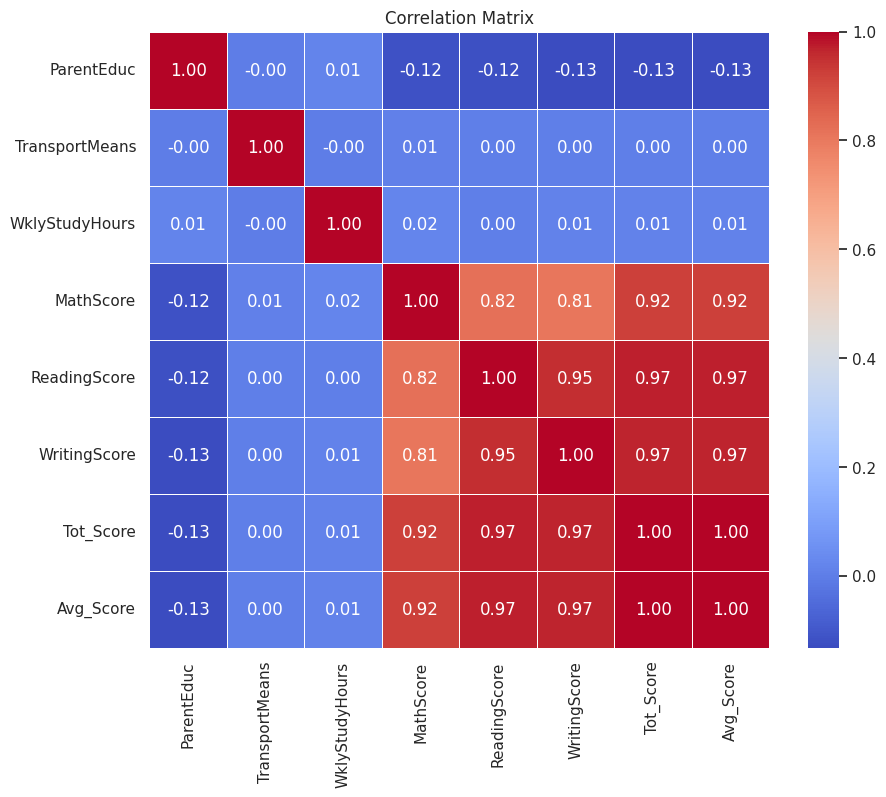

In [ ]:
# Assuming 'encoded_df' is your DataFrame with encoded data
selected_cols = encoded_df[['ParentEduc','TransportMeans','WklyStudyHours','MathScore', 'ReadingScore', 'WritingScore', 'Tot_Score','Avg_Score']]

# Calculate correlation matrix
correlation_matrix = selected_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
grouped_data = new_stdnt.groupby('EthnicGroup')['Tot_Score'].mean().reset_index()

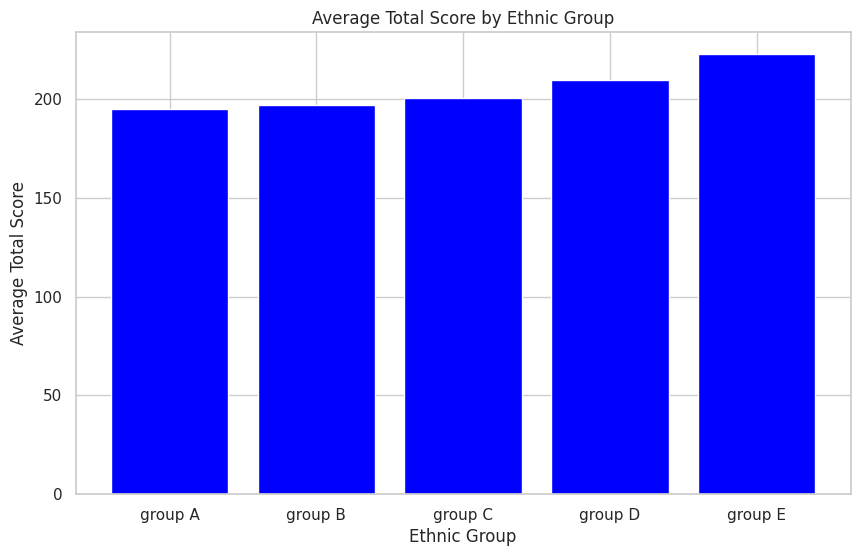

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['EthnicGroup'], grouped_data['Tot_Score'], color='Blue')
plt.xlabel('Ethnic Group')
plt.ylabel('Average Total Score')
plt.title('Average Total Score by Ethnic Group')
plt.show()


# **Create visualization**

##**3d Visualization plot**

##Note: The following code snippet was obtained from Stack Overflow

***Source: https://stackoverflow.com/questions/3810865/valueerror-unknown-projection-3d***

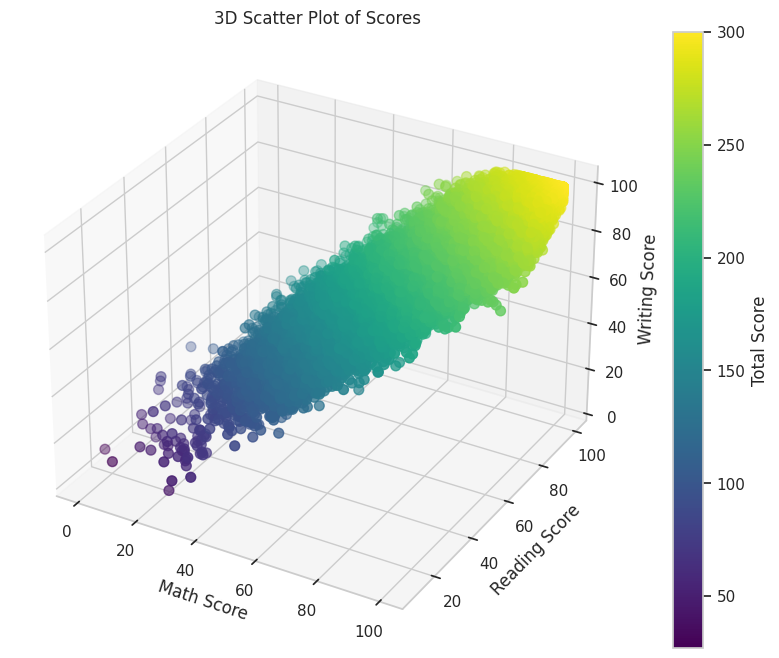

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with MathScore, ReadingScore, and WritingScore as the three axes
scatter = ax.scatter(new_stdnt['MathScore'], new_stdnt['ReadingScore'], new_stdnt['WritingScore'], c=new_stdnt['Tot_Score'], cmap='viridis', s=50)

# Customize the plot
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')
ax.set_title('3D Scatter Plot of Scores')

# Add a colorbar
cbar = fig.colorbar(scatter, ax=ax, label='Total Score')

In [ ]:
# Define features (X) and target variable (y)
features = new_stdnt[['EthnicGroup','ParentEduc','PracticeSport','MathScore', 'ReadingScore', 'WritingScore']]
target = new_stdnt['Tot_Score']

In [ ]:
# Encode categorical variables if needed
# For simplicity, let's assume 'EthnicGroup' and 'ParentEduc' are categorical features
le = LabelEncoder()
features['EthnicGroup'] = le.fit_transform(new_stdnt['EthnicGroup'])
features['ParentEduc'] = le.fit_transform(new_stdnt['ParentEduc'])
features['PracticeSport'] = le.fit_transform(new_stdnt['PracticeSport'])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Standardize numerical features if needed
scaler = StandardScaler()
X_train[['EthnicGroup','ParentEduc','PracticeSport','MathScore', 'ReadingScore', 'WritingScore']] = scaler.fit_transform(X_train[['EthnicGroup','ParentEduc','PracticeSport','MathScore', 'ReadingScore', 'WritingScore']])
X_test[['EthnicGroup','ParentEduc','PracticeSport','MathScore', 'ReadingScore', 'WritingScore']] = scaler.transform(X_test[['EthnicGroup','ParentEduc','PracticeSport','MathScore', 'ReadingScore', 'WritingScore']])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## ML Model- 01 : RandomForestRegressor

In [ ]:
# Standardize numerical features if needed
scaler = StandardScaler()
X_train[['EthnicGroup','ParentEduc','PracticeSport','MathScore', 'ReadingScore', 'WritingScore']] = scaler.fit_transform(X_train[['EthnicGroup','ParentEduc','PracticeSport','MathScore', 'ReadingScore', 'WritingScore']])
X_test[['EthnicGroup','ParentEduc','PracticeSport','MathScore', 'ReadingScore', 'WritingScore']] = scaler.transform(X_test[['EthnicGroup','ParentEduc','PracticeSport','MathScore', 'ReadingScore', 'WritingScore']])


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred )
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.401795427383736


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from matplotlib.cm import ScalarMappable

## Note: The following code snippet was obtained from Stack Overflow

***Source: https://stackoverflow.com/questions/36420908/can-i-draw-a-regression-line-and-show-parameters-using-scatterplot-with-a-pandas***

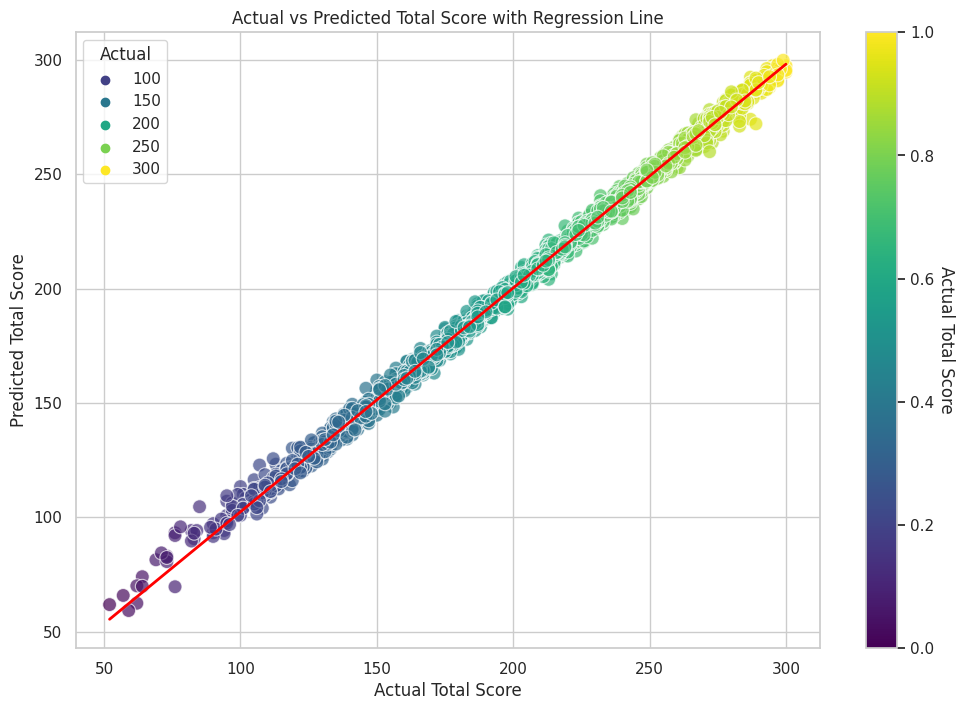

In [ ]:
viz_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Actual', y='Predicted', data=viz_df, hue=viz_df['Actual'], palette='viridis', s=100, alpha=0.7)
sns.regplot(x='Actual', y='Predicted', data=viz_df, scatter=False, color='red', line_kws={'linewidth': 2})

sm = ScalarMappable(cmap='viridis')
sm.set_array([])

cbar = plt.colorbar(sm, label='Actual Total Score', orientation='vertical')
cbar.set_label('Actual Total Score', rotation=270, labelpad=15)

plt.title('Actual vs Predicted Total Score with Regression Line')
plt.xlabel('Actual Total Score')
plt.ylabel('Predicted Total Score')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

## ML Model- 02 : K2NeighborsRegressor

In [ ]:
k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1.9693426864120547
Mean Squared Error: 7.360457261626397
R-squared: 0.9962398584653412


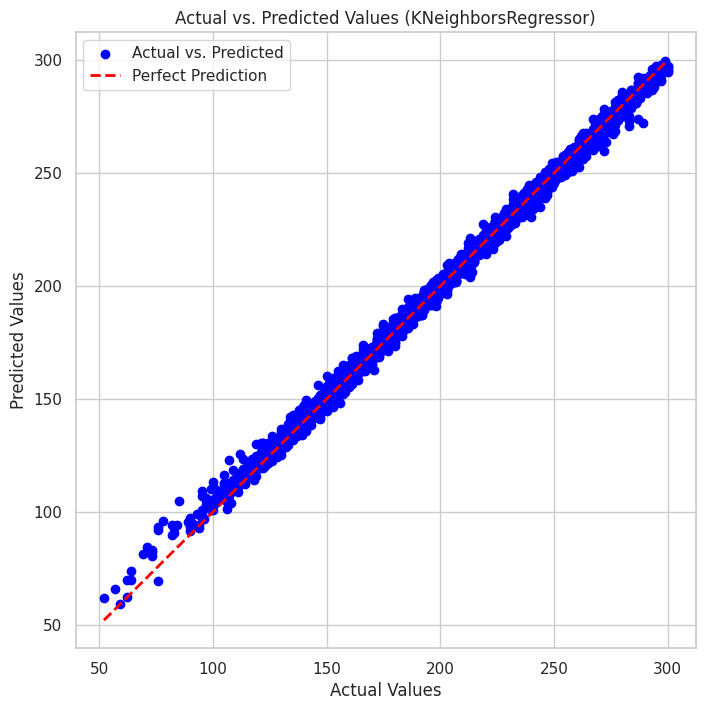

In [ ]:
# Visualize actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Values (KNeighborsRegressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
